# Function Approximation using Neural Networks

## Introduction

This Python code demonstrates how to approximate various functions using a multilayer perceptron (MLP) neural network. The code is divided into four sections, each focusing on a different function:

1. Simple Function: `f(x) = x^2`
2. Polynomial Function: `f(x) = x^3 - 2x^2 + 3x - 1`
3. Trigonometric Function: `f(x) = sin(2x) + cos(3x)`
4. Complex Function: A piecewise function with different expressions for different intervals of the input domain.

## Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

## Q1 : Simple Function

In [2]:
# Step 1: Generating synthetic data (Simple function)
np.random.seed(0)

# Simple function
def simple_function(x):
    return x**2

# Generate training data
num_points_train = 1000
X_train = np.linspace(0, 2, num_points_train).reshape(-1, 1)  # Input domain
y_train = np.array([simple_function(x[0]) for x in X_train]).reshape(-1, 1)

# Generate test data
num_points_test = 101
X_test = np.linspace(0, 2, num_points_test).reshape(-1, 1)  # Test input domain
y_test = np.array([simple_function(x[0]) for x in X_test]).reshape(-1, 1)

In [3]:
# Step 2: Scaling the input data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Step 3: Defining the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

In [5]:
# Step 4: Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Step 5: Training the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
history = []
mse_scores = []
mae_scores = []
best_fold_idx = None
best_val_loss = np.inf

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, y_train)):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    history_cv = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0,
                           validation_data=(X_val_cv, y_val_cv))

    history.append(history_cv)

    mse_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[0]
    mae_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mse_scores.append(mse_val)
    mae_scores.append(mae_val)

    print(f"Fold {len(mse_scores)}: MSE = {mse_val:.4f}, MAE = {mae_val:.4f}")

    # Keep track of the best fold
    if mse_val < best_val_loss:
        best_val_loss = mse_val
        best_fold_idx = fold_idx

print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")

Fold 1: MSE = 0.0001, MAE = 0.0079
Fold 2: MSE = 0.0000, MAE = 0.0041
Fold 3: MSE = 0.0000, MAE = 0.0034
Fold 4: MSE = 0.0000, MAE = 0.0047
Fold 5: MSE = 0.0001, MAE = 0.0059

Average MSE: 0.0000
Average MAE: 0.0052


In [7]:
# Step 6: Inverse scaling for visualization
X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [8]:
# Step 7: Plot the best fold prediction
best_fold_train_idx, best_fold_val_idx = list(kfold.split(X_train_scaled, y_train))[best_fold_idx]
X_train_best, X_val_best = X_train_scaled[best_fold_train_idx], X_train_scaled[best_fold_val_idx]
y_train_best, y_val_best = y_train[best_fold_train_idx], y_train[best_fold_val_idx]


In [9]:
# Step 8: Finding the best Fold
model.fit(X_train_best, y_train_best, epochs=100, batch_size=10, verbose=0, validation_data=(X_val_best, y_val_best))
y_pred_best = model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


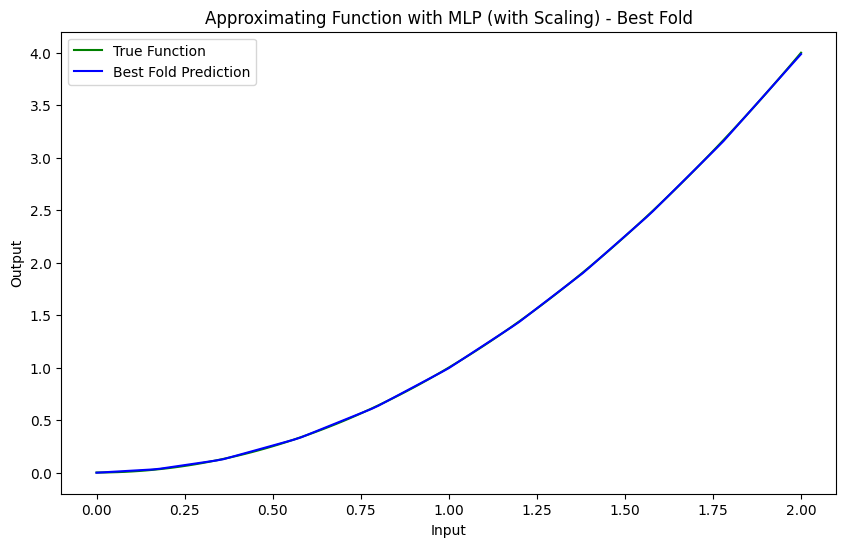

In [10]:
# Step 9: Ploting the best Model
plt.figure(figsize=(10, 6))
plt.plot(X_test_inverse, y_test, color='green', label='True Function')
plt.plot(X_test_inverse, y_pred_best, color='blue', label='Best Fold Prediction')
plt.title('Approximating Function with MLP (with Scaling) - Best Fold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

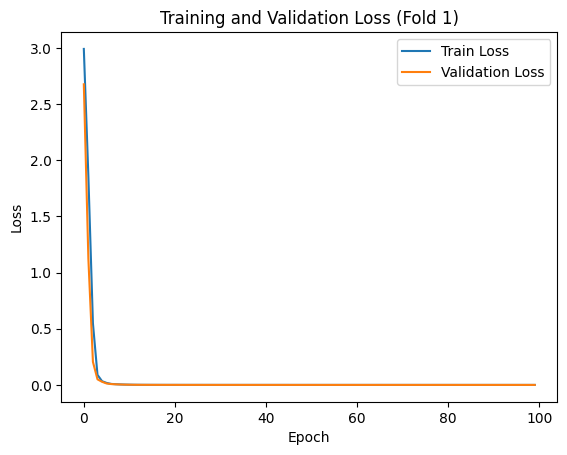

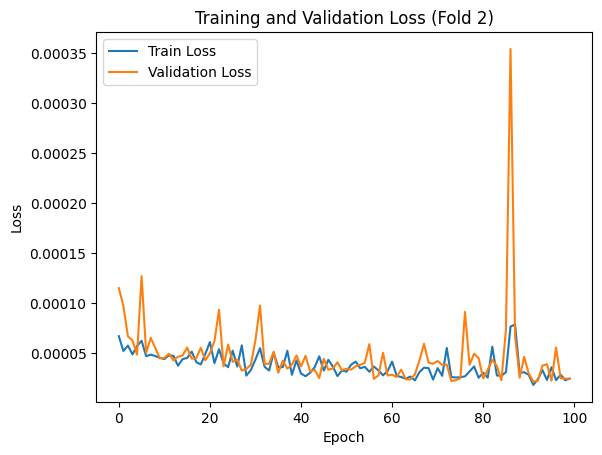

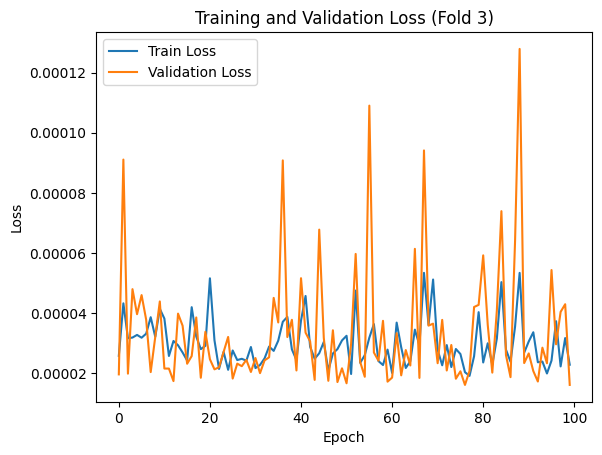

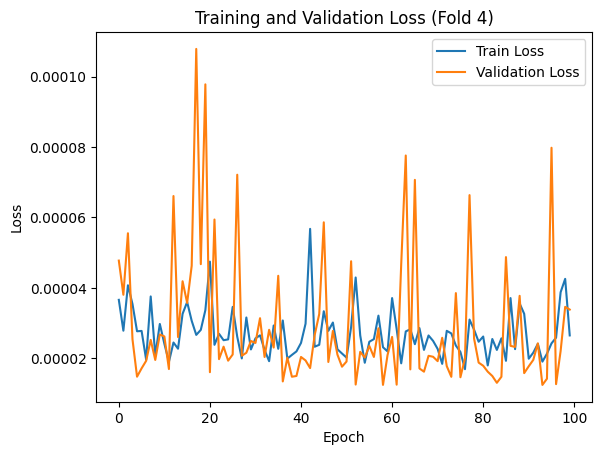

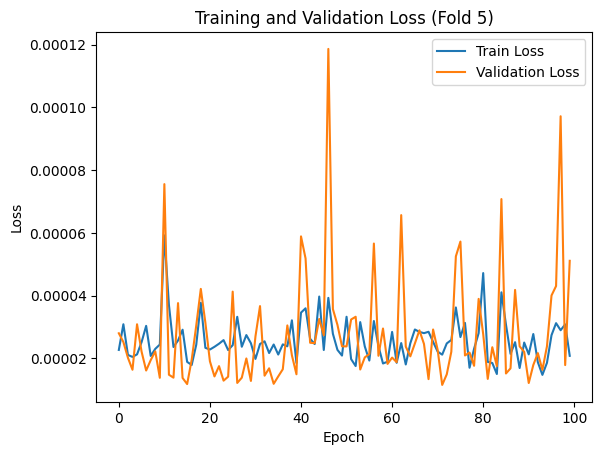

In [11]:
# Step 10: Plot training and validation loss for all folds
for i, hist in enumerate(history):
    plt.figure()
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss (Fold {i+1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Q2: Polynomial function


In [12]:
# Step 1: Generating synthetic data (Polynomial function)

# Polynomial function
def polynomial_function(x):
    return x**3 - 2*x**2 + 3*x - 1

# Generate training data
num_points_train = 1000
X_train = np.linspace(0, 7, num_points_train).reshape(-1, 1)  # Input domain
y_train = np.array([polynomial_function(x[0]) for x in X_train]).reshape(-1, 1)

# Generate test data
num_points_test = 101
X_test = np.linspace(0, 7, num_points_test).reshape(-1, 1)  # Test input domain
y_test = np.array([polynomial_function(x[0]) for x in X_test]).reshape(-1, 1)

In [13]:
# Step 2: Scaling the input data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Step 3: Defining the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

In [15]:
# Step 4: Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Step 5: Training the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
history = []
mse_scores = []
mae_scores = []
best_fold_idx = None
best_val_loss = np.inf

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, y_train)):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    history_cv = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0,
                           validation_data=(X_val_cv, y_val_cv))

    history.append(history_cv)

    mse_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[0]
    mae_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mse_scores.append(mse_val)
    mae_scores.append(mae_val)

    print(f"Fold {len(mse_scores)}: MSE = {mse_val:.4f}, MAE = {mae_val:.4f}")

    # Keep track of the best fold
    if mse_val < best_val_loss:
        best_val_loss = mse_val
        best_fold_idx = fold_idx

print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")

Fold 1: MSE = 0.2607, MAE = 0.3748
Fold 2: MSE = 0.1431, MAE = 0.2359
Fold 3: MSE = 0.1570, MAE = 0.2212
Fold 4: MSE = 0.2681, MAE = 0.3350
Fold 5: MSE = 0.0648, MAE = 0.1887

Average MSE: 0.1787
Average MAE: 0.2711


In [17]:
# Step 6: Inverse scaling for visualization
X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [18]:
# Step 7: Plot the best fold prediction
best_fold_train_idx, best_fold_val_idx = list(kfold.split(X_train_scaled, y_train))[best_fold_idx]
X_train_best, X_val_best = X_train_scaled[best_fold_train_idx], X_train_scaled[best_fold_val_idx]
y_train_best, y_val_best = y_train[best_fold_train_idx], y_train[best_fold_val_idx]


In [19]:
# Step 8: Finding the best Fold
model.fit(X_train_best, y_train_best, epochs=100, batch_size=10, verbose=0, validation_data=(X_val_best, y_val_best))
y_pred_best = model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


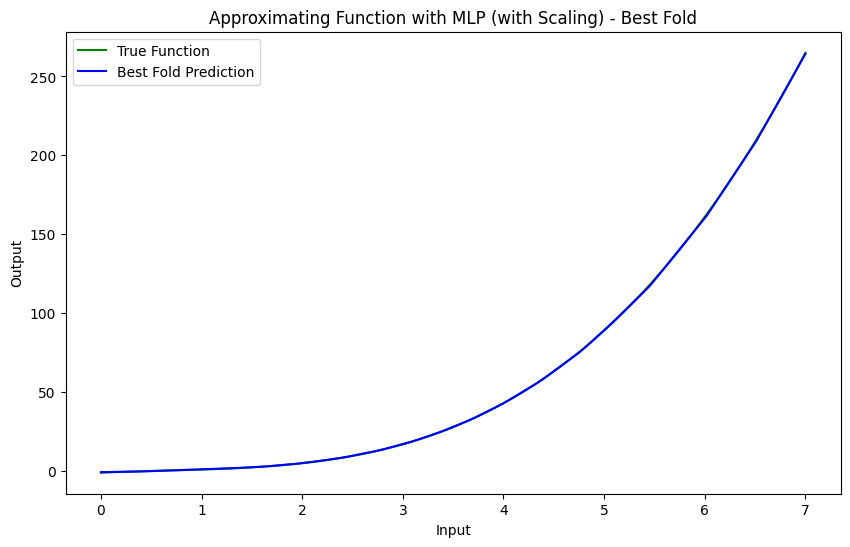

In [20]:
# Step 9: Ploting the best Model
plt.figure(figsize=(10, 6))
plt.plot(X_test_inverse, y_test, color='green', label='True Function')
plt.plot(X_test_inverse, y_pred_best, color='blue', label='Best Fold Prediction')
plt.title('Approximating Function with MLP (with Scaling) - Best Fold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

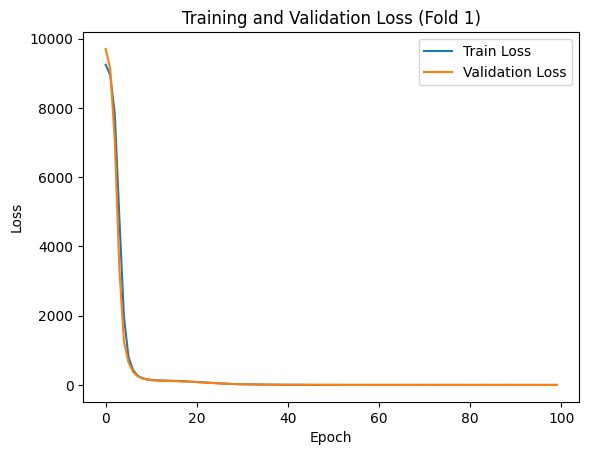

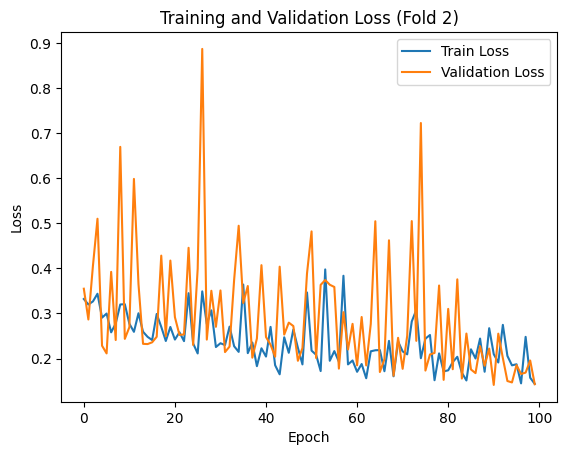

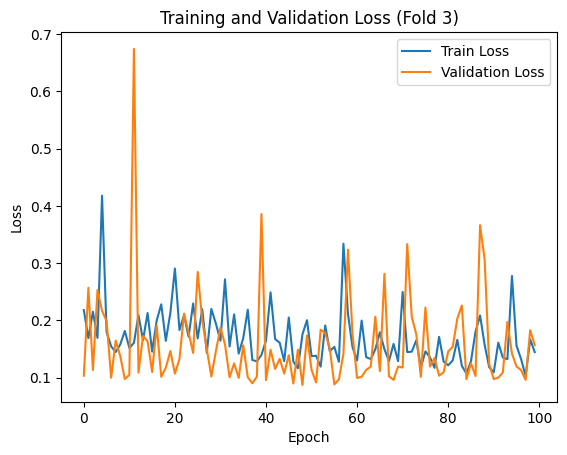

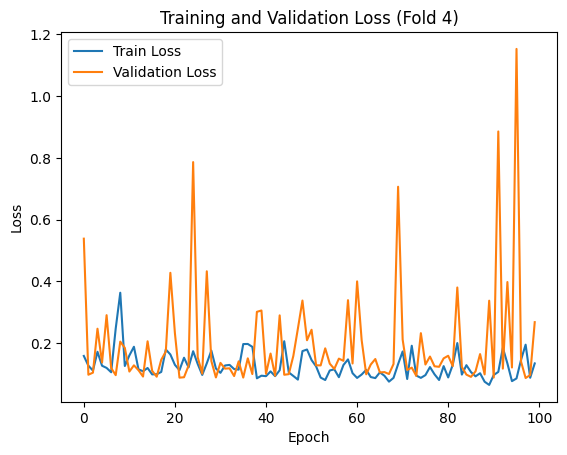

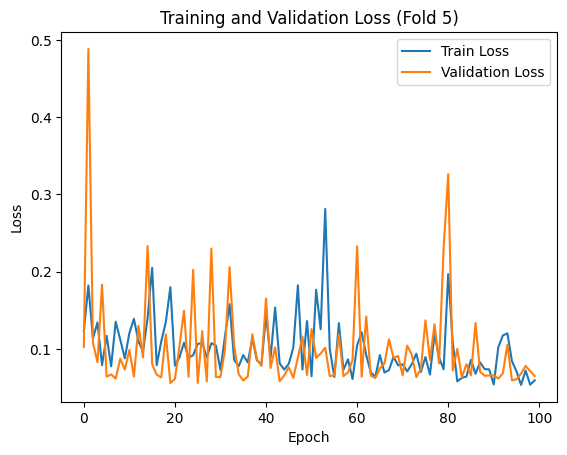

In [21]:
# Step 10: Plot training and validation loss for all folds
for i, hist in enumerate(history):
    plt.figure()
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss (Fold {i+1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Q3: Trigonometric function



In [22]:
# Step 1: Generating synthetic data (Trigonometric function)

def trigonometric_function(x):
    return np.sin(2*x) + np.cos(3*x)

# Generate training data
num_points_train = 1000
X_train = np.linspace(0, 2*np.pi, num_points_train).reshape(-1, 1)  # Input domain
y_train = np.array([trigonometric_function(x[0]) for x in X_train]).reshape(-1, 1)

# Generate test data
num_points_test = 101
X_test = np.linspace(0, 2*np.pi, num_points_test).reshape(-1, 1)  # Test input domain
y_test = np.array([trigonometric_function(x[0]) for x in X_test]).reshape(-1, 1)

In [23]:
# Step 2: Scaling the input data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Step 3: Defining the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

In [25]:
# Step 4: Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Step 5: Training the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
history = []
mse_scores = []
mae_scores = []
best_fold_idx = None
best_val_loss = np.inf

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, y_train)):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    history_cv = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0,
                           validation_data=(X_val_cv, y_val_cv))

    history.append(history_cv)

    mse_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[0]
    mae_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mse_scores.append(mse_val)
    mae_scores.append(mae_val)

    print(f"Fold {len(mse_scores)}: MSE = {mse_val:.4f}, MAE = {mae_val:.4f}")

    # Keep track of the best fold
    if mse_val < best_val_loss:
        best_val_loss = mse_val
        best_fold_idx = fold_idx

print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")

Fold 1: MSE = 0.0614, MAE = 0.1559
Fold 2: MSE = 0.0554, MAE = 0.1627
Fold 3: MSE = 0.0495, MAE = 0.1464
Fold 4: MSE = 0.0428, MAE = 0.1257
Fold 5: MSE = 0.0018, MAE = 0.0276

Average MSE: 0.0422
Average MAE: 0.1237


In [27]:
# Step 6: Inverse scaling for visualization
X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [28]:
# Step 7: Plot the best fold prediction
best_fold_train_idx, best_fold_val_idx = list(kfold.split(X_train_scaled, y_train))[best_fold_idx]
X_train_best, X_val_best = X_train_scaled[best_fold_train_idx], X_train_scaled[best_fold_val_idx]
y_train_best, y_val_best = y_train[best_fold_train_idx], y_train[best_fold_val_idx]


In [29]:
# Step 8: Finding the best Fold
model.fit(X_train_best, y_train_best, epochs=100, batch_size=10, verbose=0, validation_data=(X_val_best, y_val_best))
y_pred_best = model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


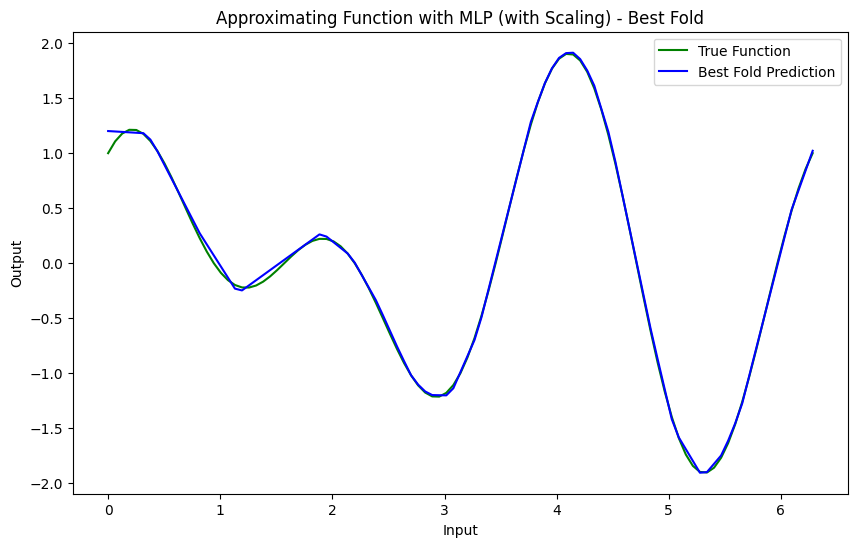

In [30]:
# Step 9: Ploting the best Model
plt.figure(figsize=(10, 6))
plt.plot(X_test_inverse, y_test, color='green', label='True Function')
plt.plot(X_test_inverse, y_pred_best, color='blue', label='Best Fold Prediction')
plt.title('Approximating Function with MLP (with Scaling) - Best Fold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

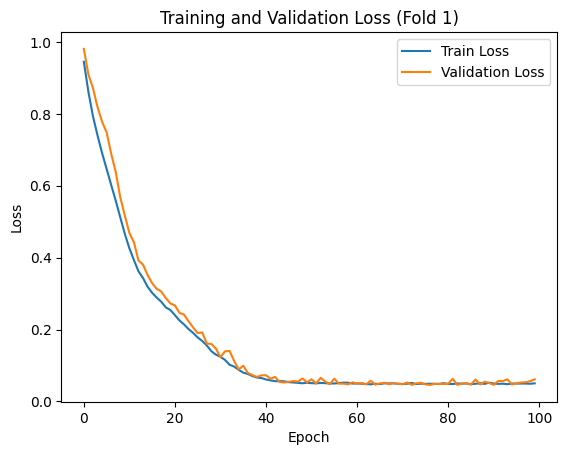

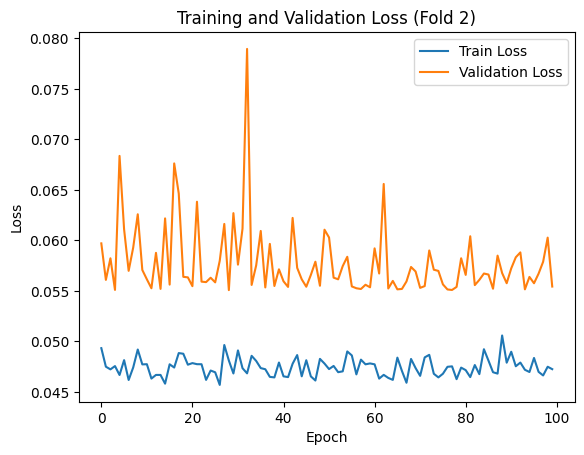

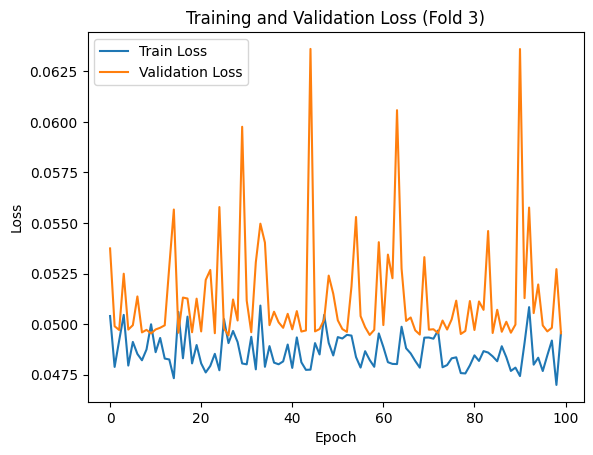

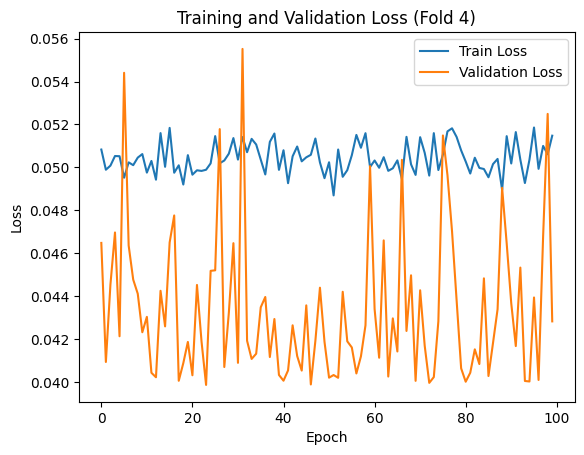

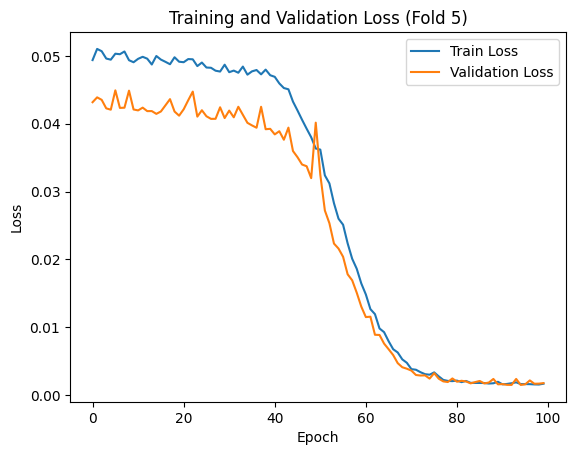

In [31]:
# Step 10: Plot training and validation loss for all folds
for i, hist in enumerate(history):
    plt.figure()
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss (Fold {i+1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Q4: Complex function


In [32]:
# Step 1: Generating synthetic data (Complex function)

def complex_function(x):
    if x < np.pi/3:
        return np.sin(x)
    elif x == np.pi/3:
        return 0.5  # Ensure continuity at π/3
    elif x < np.pi:
        return np.cos(2 * x)
    elif x == np.pi:
        return np.log(np.pi + 1)  # Ensure continuity at π
    elif x < 3 * np.pi / 2:
        return np.log(x - np.pi + 1)
    elif x == 3 * np.pi / 2:
        return 3 * np.pi / 2  # Ensure continuity at 3π/2
    elif x < 2 * np.pi:
        return x - 3 * np.pi / 2
    else:  # x == 2 * np.pi
        return 0  # Ensure continuity at 2π

# Generate training data
num_points_train = 1000
X_train = np.linspace(0, 2*np.pi, num_points_train).reshape(-1, 1)  # Input domain
y_train = np.array([complex_function(x[0]) for x in X_train]).reshape(-1, 1)

# Generate test data
num_points_test = 101
X_test = np.linspace(0, 2*np.pi, num_points_test).reshape(-1, 1)  # Test input domain
y_test = np.array([complex_function(x[0]) for x in X_test]).reshape(-1, 1)

In [33]:
# Step 2: Scaling the input data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Step 3: Defining the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

In [35]:
# Step 4: Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.8

In [36]:
# Step 5: Training the model with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
history = []
mse_scores = []
mae_scores = []
best_fold_idx = None
best_val_loss = np.inf

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, y_train)):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    history_cv = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0,
                           validation_data=(X_val_cv, y_val_cv))

    history.append(history_cv)

    mse_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[0]
    mae_val = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mse_scores.append(mse_val)
    mae_scores.append(mae_val)

    print(f"Fold {len(mse_scores)}: MSE = {mse_val:.4f}, MAE = {mae_val:.4f}")

    # Keep track of the best fold
    if mse_val < best_val_loss:
        best_val_loss = mse_val
        best_fold_idx = fold_idx

print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")

Fold 1: MSE = 0.0137, MAE = 0.0451
Fold 2: MSE = 0.0309, MAE = 0.0814
Fold 3: MSE = 0.0281, MAE = 0.0515
Fold 4: MSE = 0.0118, MAE = 0.0397
Fold 5: MSE = 0.0070, MAE = 0.0355

Average MSE: 0.0183
Average MAE: 0.0506


In [37]:
# Step 6: Inverse scaling for visualization
X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [38]:
# Step 7: Plot the best fold prediction
best_fold_train_idx, best_fold_val_idx = list(kfold.split(X_train_scaled, y_train))[best_fold_idx]
X_train_best, X_val_best = X_train_scaled[best_fold_train_idx], X_train_scaled[best_fold_val_idx]
y_train_best, y_val_best = y_train[best_fold_train_idx], y_train[best_fold_val_idx]


In [39]:
# Step 8: Finding the best Fold
model.fit(X_train_best, y_train_best, epochs=100, batch_size=10, verbose=0, validation_data=(X_val_best, y_val_best))
y_pred_best = model.predict(X_test_scaled)


4/4 [==============================] - 0s 3ms/step


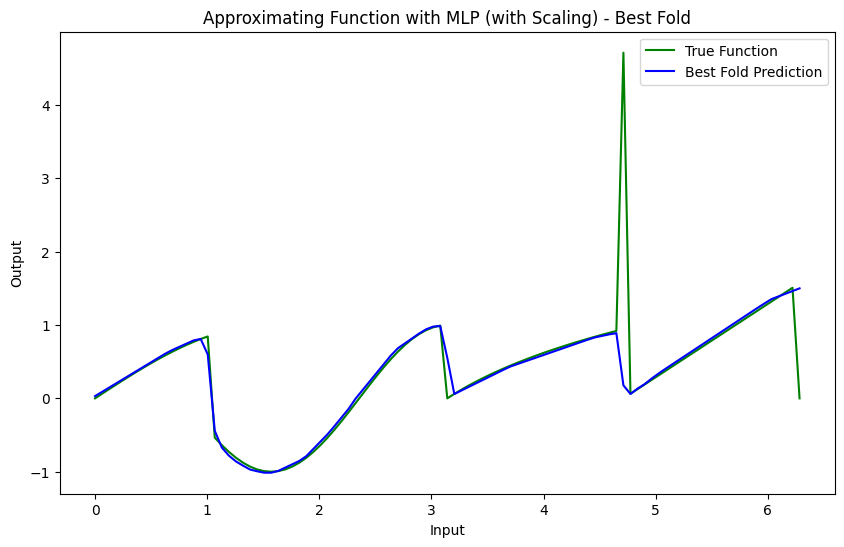

In [40]:
# Step 9: Ploting the best Model
plt.figure(figsize=(10, 6))
plt.plot(X_test_inverse, y_test, color='green', label='True Function')
plt.plot(X_test_inverse, y_pred_best, color='blue', label='Best Fold Prediction')
plt.title('Approximating Function with MLP (with Scaling) - Best Fold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

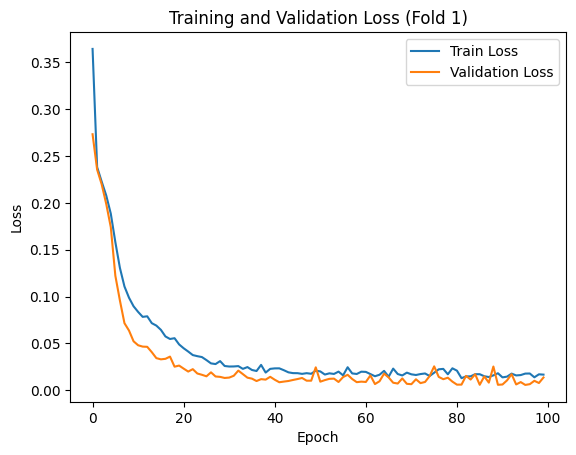

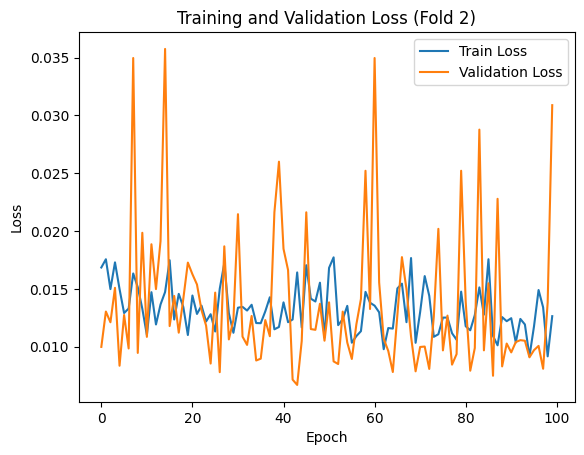

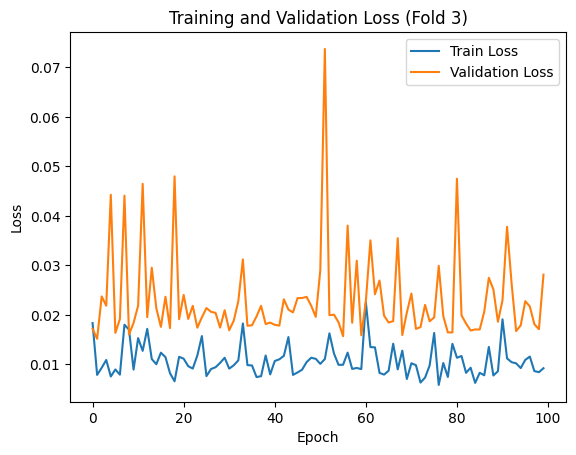

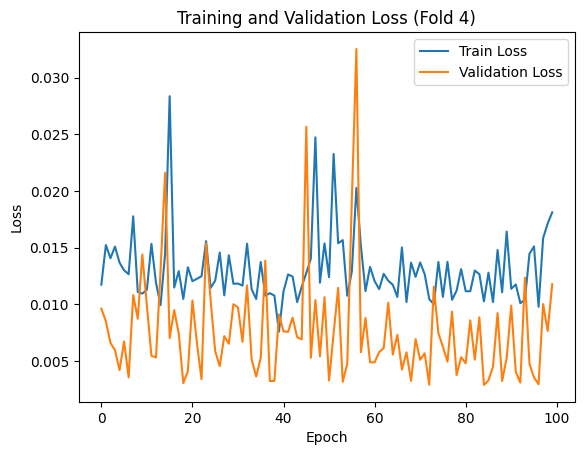

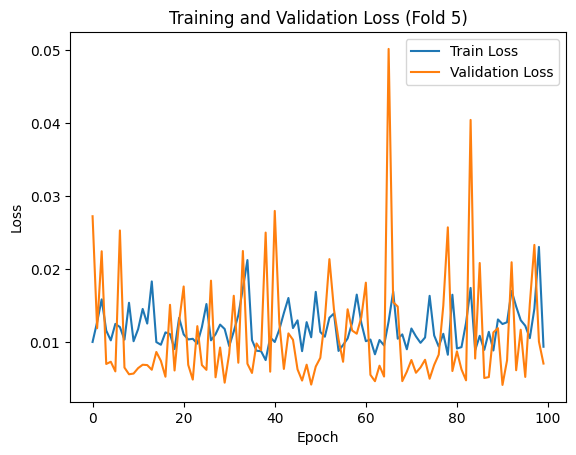

In [41]:
# Step 10: Plot training and validation loss for all folds
for i, hist in enumerate(history):
    plt.figure()
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss (Fold {i+1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()